# Importing Libraries

In [1]:
import pandas as pd 
import numpy as np  
import matplotlib.pyplot as plt
import os
import matplotlib.axes as ax

In [3]:
os.chdir("../")

In [4]:
data=pd.read_csv("data_for_lr.csv")

In [5]:
data=data.dropna()

# Spliting the data

In [6]:
# training input and output

train_input=np.array(data.x[0:500]).reshape(500,1)
train_output=np.array(data.y[0:500]).reshape(500,1)

# validating data input and output

test_input=np.array(data.x[500:700]).reshape(199,1)
test_output=np.array(data.y[500:700]).reshape(199,1)

In [7]:
print(f"training input shape = {train_input.shape}")
print(f"training input shape = {train_output.shape}")
print(f"training input shape = {test_input.shape}")
print(f"training input shape = {test_input.shape}")

training input shape = (500, 1)
training input shape = (500, 1)
training input shape = (199, 1)
training input shape = (199, 1)


# <font color = "green">Linear Regression</font>


## Forward Propogation

f(x)=m*x+c

In [8]:
def forward_propogation(train_input,parameters):
    
    m=parameters["m"]
    c=parameters["c"]
    
    predictions=np.multiply(m,train_input) + c
    
    return predictions

# COST FUNCTION

In [9]:
def cost_function(parameters,train_output):
    cost=np.mean((train_output-parameters)**2)*0.5
    return cost

## Gradient Descent for Back Propagation

df=summ((f(x)-y)/n)

dm=df*x

dc=df*1

In [10]:
def backward_propogation(train_input,train_output,predictions):
    
    derivatives = dict();
    
    df=predictions-train_output
    
    dm=np.mean(np.multiply(df, train_input))
    
    dc=np.mean(df)
    
    derivatives["dm"]=dm
    derivatives["dc"]=dc
    
    return derivatives

# UPDATE PARAMETERS

m=m-(learning_rate*dm)

c=c-(learning_rate*dc)

In [11]:
def update_parameters(parameters,learning_rate,derivatives):
    
    parameters["m"]=parameters["m"] - learning_rate * derivatives['dm']
    parameters["c"]=parameters["c"] - learning_rate * derivatives['dc']
    
    return parameters

# Model Training

In [12]:
def train(train_input,train_output,learning_rate,iters):

    # Random Parameters
    parameters=dict()
    parameters["m"]=np.random.uniform(0,1)
    parameters["c"]=np.random.uniform(0,1)
    
    plt.figure()
    
    #loss
    loss=list();
    
    # iteration
    for i in range(iters):
        
        # forward propogation
        predictions=forward_propogation(train_input,parameters)
        
        #cost fuction
        cost=cost_function(predictions,train_output)
        
        loss.append(cost)
        print(f"Iteration = {i+1}, Loss={cost}")
        
        #plot
        fig, ax=plt.subplots()
        
        ax.plot(train_input,train_output,"+", label = "Original" )
        ax.plot(train_input,predictions ,"+", label = "Training" )
        
        legend=ax.legend()
        
        plt.plot(train_input,train_output, "+", label = "Original" )
        plt.plot(train_input,train_output, "+", label = "Training" )
        plt.show()
        
        
        
        #back_propogation
        derivatives=backward_propogation(train_input,train_output,predictions)
        
        #update_parameters
        parameters=update_parameters(parameters,learning_rate,derivatives)
    
    return parameters,loss
    

## Training 

Iteration = 1, Loss=633.0802113156395


<Figure size 640x480 with 0 Axes>

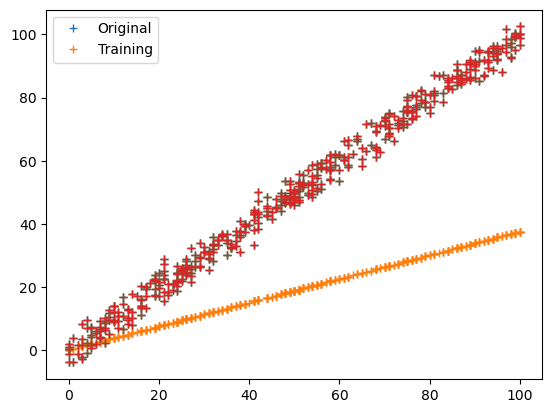

Iteration = 2, Loss=289.37370560097565


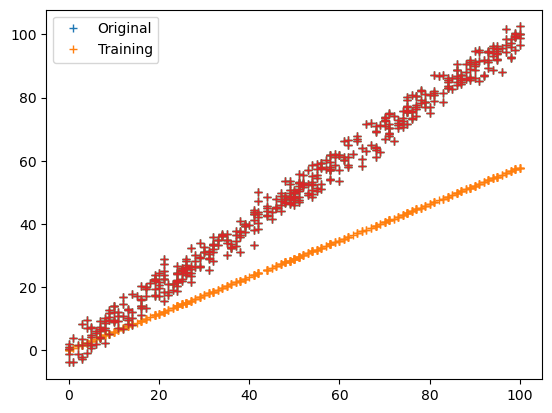

Iteration = 3, Loss=133.43368283729774


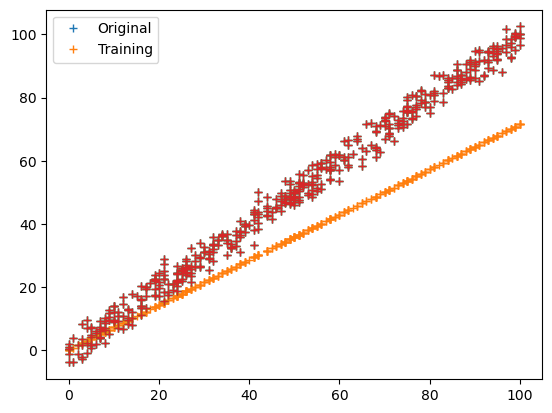

Iteration = 4, Loss=62.68352136639846


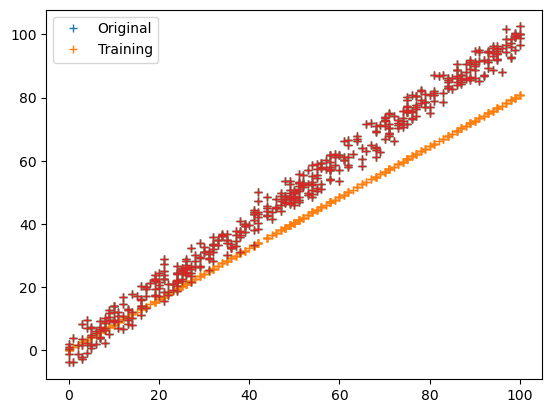

Iteration = 5, Loss=30.58409432385521


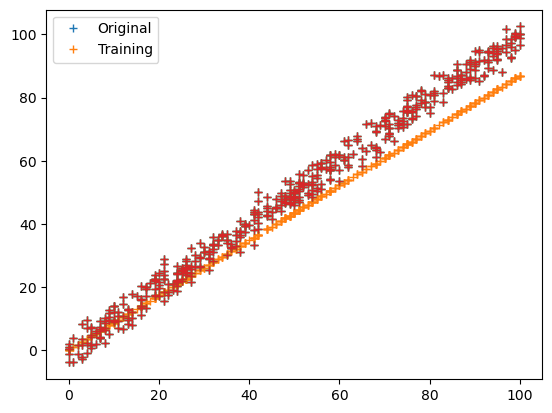

Iteration = 6, Loss=16.02054830262454


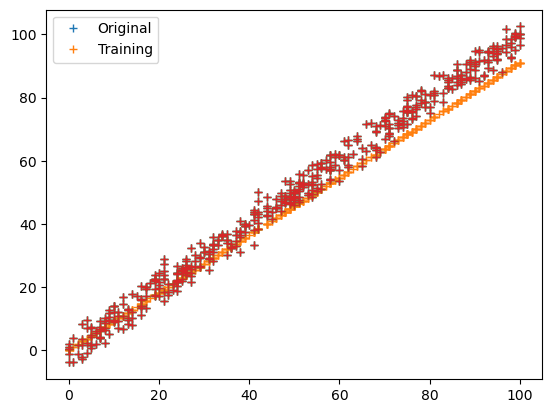

Iteration = 7, Loss=9.413050924248957


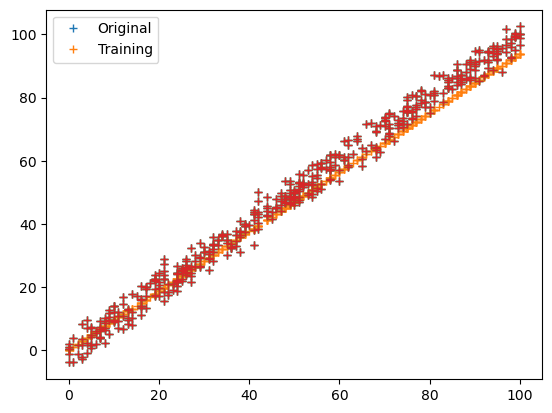

Iteration = 8, Loss=6.415221627605123


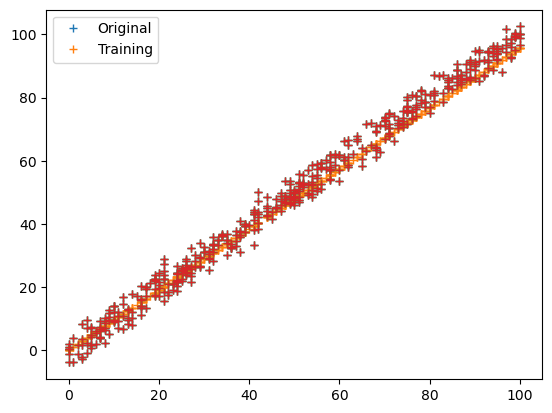

Iteration = 9, Loss=5.055102737881151


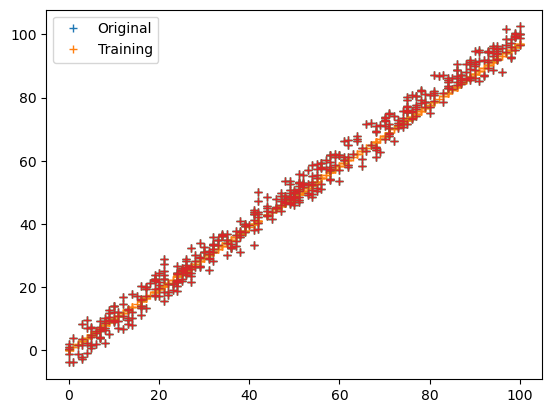

Iteration = 10, Loss=4.438014873793269


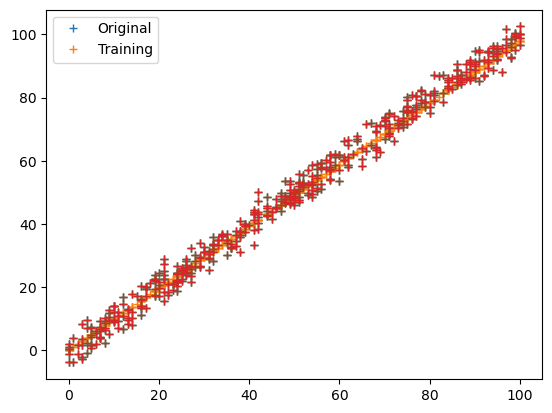

Iteration = 11, Loss=4.1580410090692945


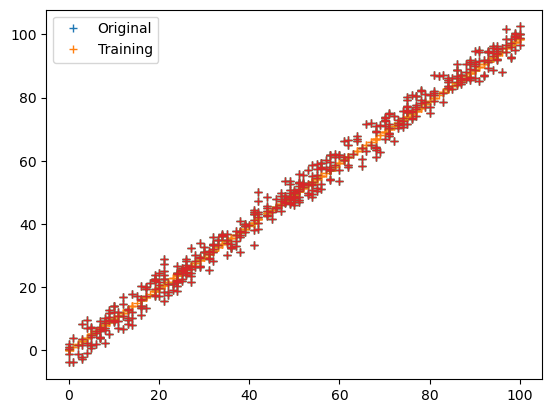

Iteration = 12, Loss=4.031016139279115


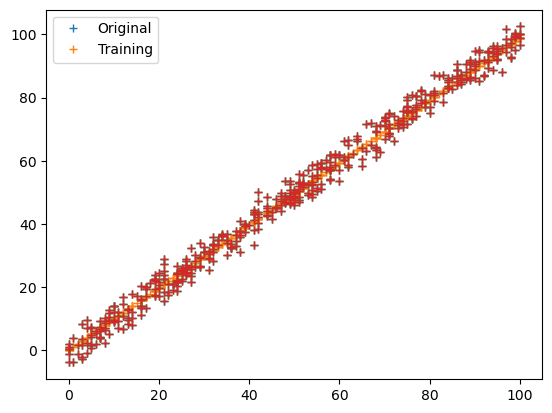

Iteration = 13, Loss=3.9733843979240193


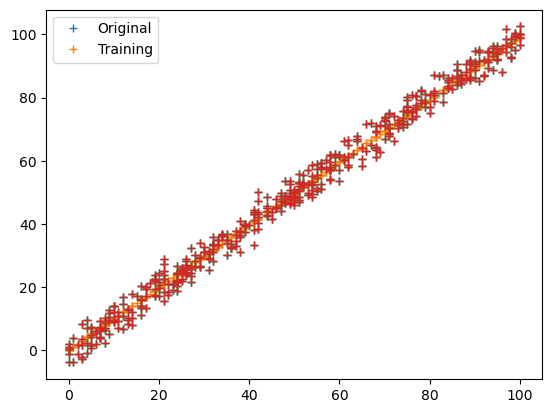

Iteration = 14, Loss=3.9472363958236265


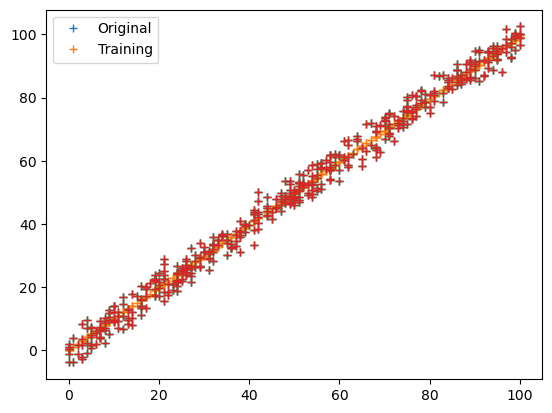

Iteration = 15, Loss=3.9353726011167973


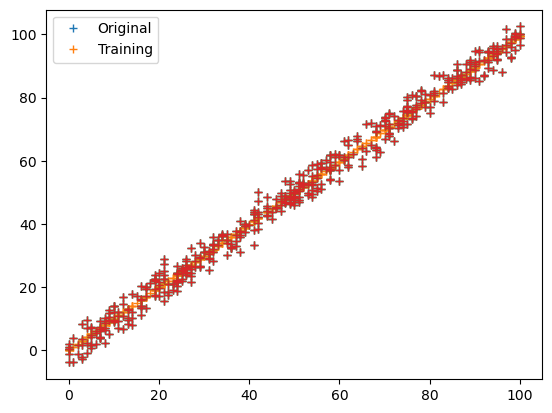

Iteration = 16, Loss=3.9299895671472216


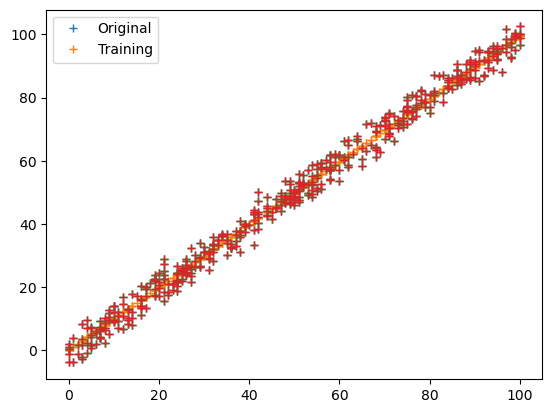

Iteration = 17, Loss=3.927546861523508


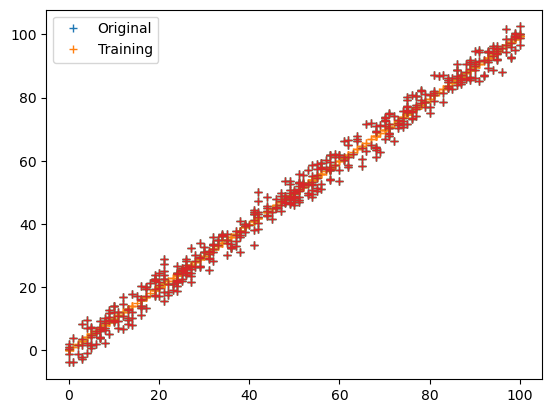

Iteration = 18, Loss=3.926438186148155


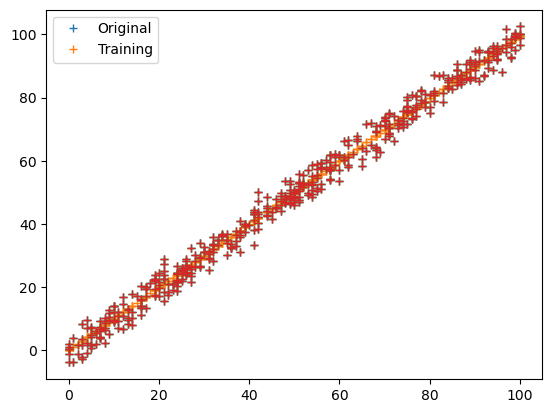

Iteration = 19, Loss=3.925934761795122


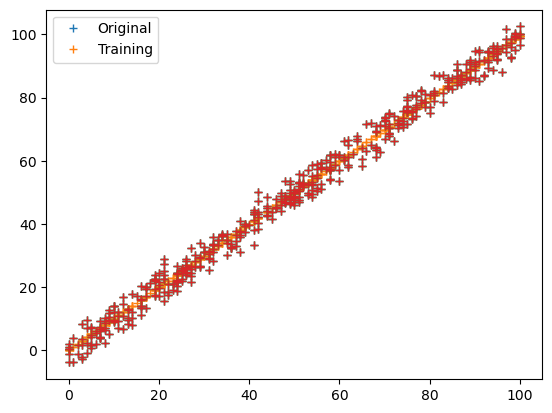

Iteration = 20, Loss=3.925705940522327


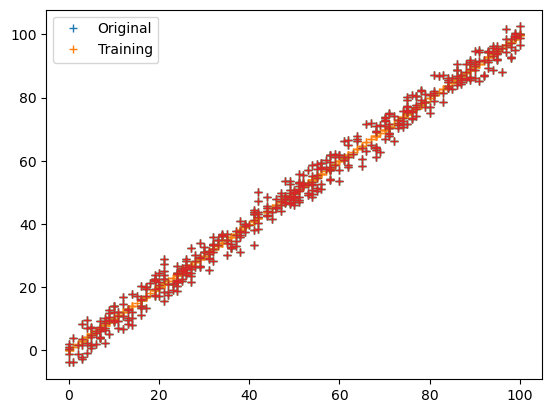

In [13]:
parameters,loss=train(train_input,train_output,0.0001,20)

In [40]:
print(parameters)

{'m': 0.9958645809928572, 'c': 0.10290942180607605}


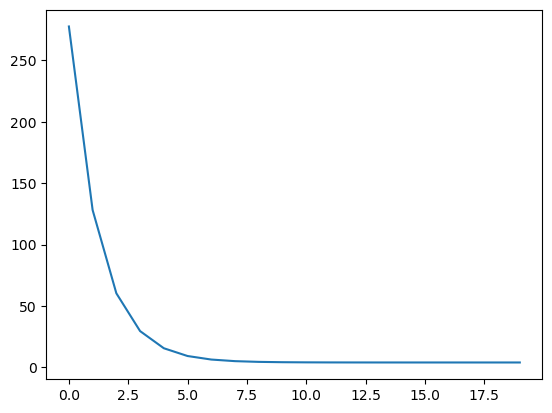

In [17]:
plt.plot(loss)

# Let's Predict

In [44]:
test_predictions=test_input * parameters["m"] + parameters["c"]


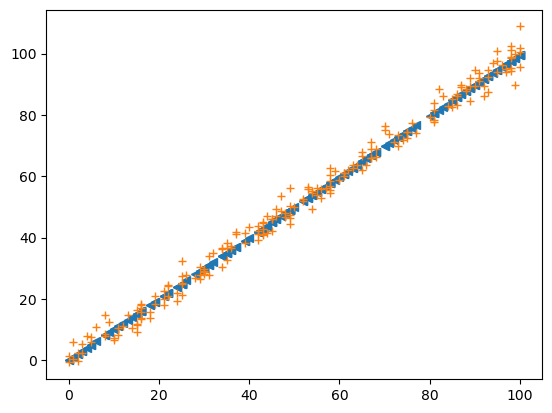

In [47]:
plt.plot(test_input,test_predictions,"<")
plt.plot(test_input,test_output     ,"+")
plt.show()

## Cost prediction

In [48]:
cost_function(test_output,test_predictions)

3.9958049776305615

# Using ScikitLearnLibrary

In [49]:
from sklearn.linear_model import LinearRegression

In [50]:
lr_model=LinearRegression()

In [51]:
lr_model.fit(train_input,train_output)

LinearRegression()

In [52]:
lr_model.coef_

array([[1.0009993]])

In [53]:
lr_model.intercept_

array([-0.23603461])

## Predicition

In [54]:
test_predictions=lr_model.predict(test_input)

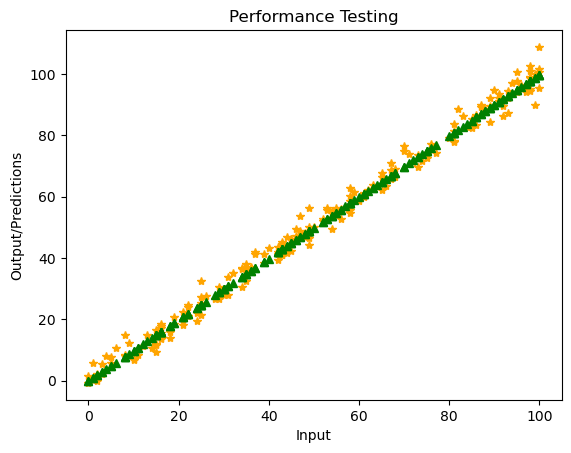

In [56]:
plt.plot(test_input,test_output     ,"*",color ="orange")
plt.plot(test_input,test_predictions,"^",color ="green")
plt.title("Performance Testing")
plt.xlabel("Input")
plt.ylabel("Output/Predictions")
plt.show()